In [37]:
import pandas as pd
import numpy as np
data = pd.read_csv('../original/data_processed.csv')

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['s_Esq45','s_Esq30','s_Frente','s_Dir30','s_Dir45','angulo_robo_destino']], data[['saida_linear','saida_angular']], shuffle=True, test_size=0.05)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(x_train)
X_transformed_train = sc.transform(x_train)
X_transformed_test = sc.transform(x_test)

In [40]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(
        max_iter=50000000,
        activation='relu',
        solver='adam',
        verbose=0,
        hidden_layer_sizes=(1000,500,100),
        learning_rate='adaptive',
    )

In [41]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

score_1 = regr.score(x_test, y_test)
print(score_1)


0.9233316389640289


<AxesSubplot: >

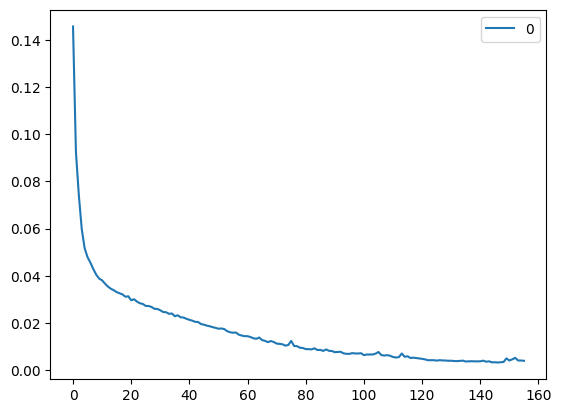

In [42]:
pd.DataFrame(regr.loss_curve_).plot()

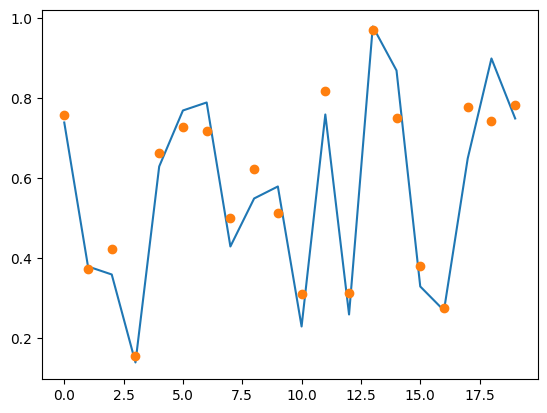

In [43]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 0], label='Linear Velocity Test Set')
plt.plot(y_pred[:, 0], 'o', label='Linear Velocity Prediction Set')

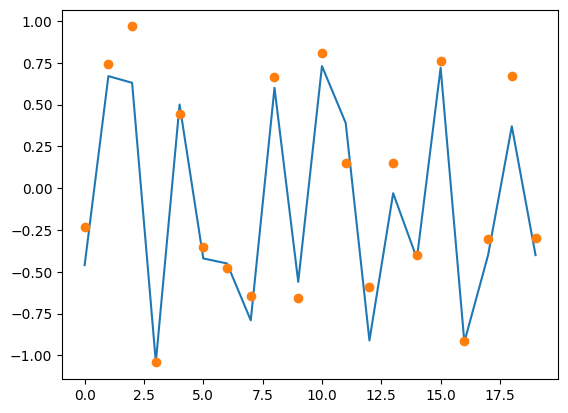

In [44]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 1], label='Angular Velocity Test Set')
plt.plot(y_pred[:, 1], 'o', label='Angular Velocity Prediction Set')

In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regr.fit(X_transformed_train, y_train)
y_pred_transformed = regr.predict(X_transformed_test)

score_2 = regr.score(X_transformed_test, y_test)
print(score_2)



0.9349658984699452


<AxesSubplot: >

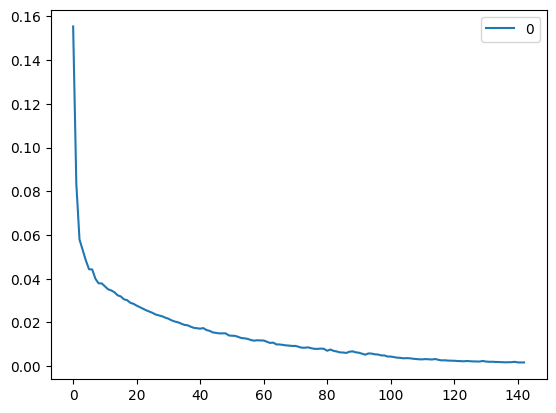

In [46]:
pd.DataFrame(regr.loss_curve_).plot()

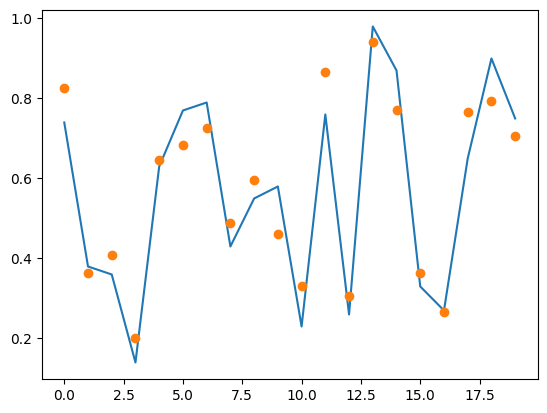

In [47]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 0], label='Linear Velocity Test Set')
plt.plot(y_pred_transformed[:, 0], 'o', label='Linear Velocity Prediction Set')

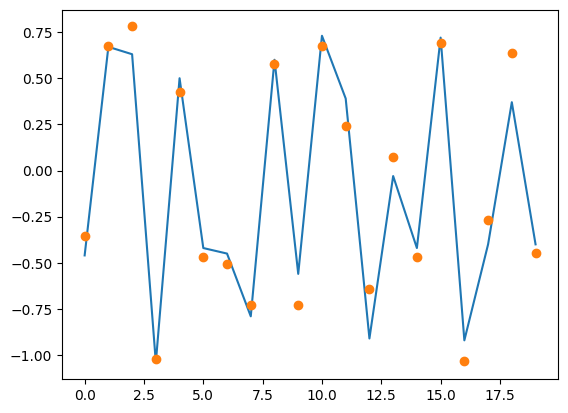

In [48]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:, 1], label='Angular Velocity Test Set')
plt.plot(y_pred_transformed[:, 1], 'o', label='Angular Velocity Prediction Set')